# LAB0 - Podstawy

Przedmiot: _Sztuczna Inteligencja w Systemach Informatycznych_

Autor: Tomasz Szydło

kontakt: tszydlo@agh.edu.pl


# Wprowadzenie

Celem zajęć jest zaznajomienie się z podstawowymi technikami sotosowanymi w uczeniu maszynowym. W trakcie zajęć laboratoryjnych zostanie wykorzystany zbiór danych Irys, a następnie dla wybranych algorytmów uczenia maszynowego zostanie zidentyfikowany jeden, który cechuje się najwyższą jakością klasyfikacji.

Środowisko pracy: Anaconda, Jupyter Notebook

Narzędzia: Scikit Learn, Python

## Zbiór _Iris_

Zbiór danych *iris*  zawiera 150 instancji opisujących kwiaty Irysa. Kwiaty są określone przy pomocy 4 atrybutów numerycznych opisujących długości i szerokości płatków kwiatu *sepal* i *petal*. Ostatni atrybut jakościowy definiuje gatunek opisywanego Irysa (species). Jednym z problemów możliwych do rozwiązania przy użyciu tego zbioru uczącego jest określenie gatunku dla nowego kwiatu Irysa w zależności od wielkości jego płatków. Jest to przykład zadania klasyfikacji.

Zbiór uczący *iris* jest zbiorem etykietowanym ponieważ klasa, czyli konkretny gatunek irysa jest znany dla każdej instancji (obiektu) w zbiorze uczącym:

https://archive.ics.uci.edu/ml/datasets/iris

```
Source:

Creator:

R.A. Fisher

Donor:

Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
```
![](iris.png)

# Konfiguracja wstępna

In [28]:
# Konfiguracja interakcji z wykresami pakietu matplotlib

# Standardowe rozwiązanie
%matplotlib inline

# Interaktywne wykresy - może powodować błędy
# %matplotlib notebook

In [29]:
# Załaduj biblioteki
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import numpy as np




# Operacje na danych tablicowych - przykłady dla _NumPy_

In [30]:
# NumPy - tworzenie tablic

a = np.array([1,2,3])
b = np.array([(1.5,2,3), (4,5,6)], dtype = float)
c = np.array([[(1.5,2,3), (4,5,6)], [(3,2,1), (4,5,6)]], dtype = float)

print(a)
print(b)
print(c)

[1 2 3]
[[1.5 2.  3. ]
 [4.  5.  6. ]]
[[[1.5 2.  3. ]
  [4.  5.  6. ]]

 [[3.  2.  1. ]
  [4.  5.  6. ]]]


In [31]:
# NumPy - przeglądanie tablic

print(a.shape)
print(len(a))
print(b.ndim)
print(c.size)
print(b.dtype)
print(b.dtype.name)
print(b.astype(int))

(3,)
3
2
12
float64
float64
[[1 2 3]
 [4 5 6]]


In [32]:
# NumPy - subsetting

print(a[2]) #wybierz element z indeksem równym 2
print(b[1,2]) # wybierz element z pierwszego wiersza i drugiej kolumny

# NumPy - slicing
print(a[0:2])   #wybierz elementy o indeksach 0 i 1
print(b[0:2,1]) #wybierz elementy z wiersza 0 i 1 oraz kolumny 1

print(b[:1])    #wybierz elementy z wiersza 0 
print(b[0:1,:]) #wybierz elementy z wiersza 0

3
6.0
[1 2]
[2. 5.]
[[1.5 2.  3. ]]
[[1.5 2.  3. ]]


# Wczytywanie danych - biblioteka _Pandas_

Przeanalizuj w edytorze teksotwym format i zawartośc pliku wejściowego ze zbiorem - plik _iris.csv_.

_UWAGA! W przypadku błędów z odczytem danych popraw pliki zawierające dane wejściowe._

In [33]:
filename = 'iris.csv'
dataset = read_csv(filename)

Wypisz rozmiar danych wejściowych.

In [34]:
print(dataset.shape)

(150, 5)


Sprawdź poprawność odczytania danych poprzez wypisanie pierwszych 20 wierszy.

In [35]:
dataset[0:20]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


# Analiza statystyczna

Sprawdź jaki jest przedział wartości, czy nie ma elementów znacznie odbiegających od wartości oczekiwanej. Mogłoby to sugerować błędy w danych wejściowych.

In [36]:
# descriptions
print("MIN VALUES")
print(dataset.min())
print("\nMAX VALUES")
print(dataset.max())

MIN VALUES
sepal.length       4.3
sepal.width        2.0
petal.length       1.0
petal.width        0.1
variety         Setosa
dtype: object

MAX VALUES
sepal.length          7.9
sepal.width           4.4
petal.length          6.9
petal.width           2.5
variety         Virginica
dtype: object


Sprawdź czy licznośc klas wynikowych jest zbliżona. Występowanie znacznych dysproporcji może skutkować błędnym wyuczeniem modelu.

In [37]:
# class distribution
print(dataset.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


# Wizualizacja danych

Narysuj wykresy przedstawiające dane wejściowe.

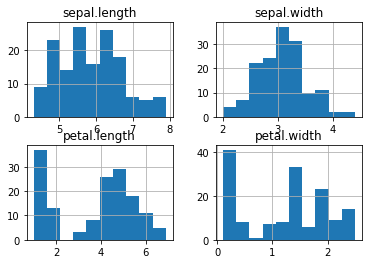

In [38]:
dataset.hist()
pyplot.show()

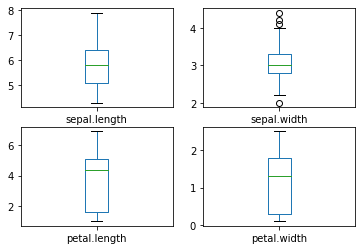

In [39]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

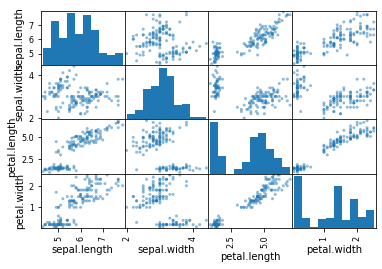

In [40]:
scatter_matrix(dataset)
pyplot.show()

# Ewaluacja wybranego algorytmu ML

Na potrzeby klasyfikacji irysów zdecydowano się wykorzystać model ML bazujący ba regresji logistycznej. W procesie uczenia wykrozystamy dwa zbiory danych - treningowy oraz testowy z podziałem 20%/80%.

Stwórz dwie tablice:
 - X składającą się z 4 kolumn - cechy wejściowe
 - Y składającą się z 1 kolumny - etykiety klasy dla zbioru uczącego

In [41]:
array = dataset.values
np.random.shuffle(array)
X = array[:,0:4]
Y = array[:,4]

Wypisz tablice aby sprawdzić ich poprawność.

In [42]:
print(X.shape)
print(X)

print(Y.shape)
print(Y)

(150, 4)
[[6.5 3.2 5.1 2.0]
 [5.8 2.7 5.1 1.9]
 [7.2 3.6 6.1 2.5]
 [5.0 3.5 1.3 0.3]
 [5.1 3.4 1.5 0.2]
 [5.7 2.9 4.2 1.3]
 [6.4 3.1 5.5 1.8]
 [6.7 3.1 4.7 1.5]
 [6.3 2.3 4.4 1.3]
 [4.3 3.0 1.1 0.1]
 [6.4 2.9 4.3 1.3]
 [6.8 3.0 5.5 2.1]
 [5.5 2.5 4.0 1.3]
 [5.4 3.7 1.5 0.2]
 [4.6 3.2 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.9 3.1 1.5 0.1]
 [5.1 3.7 1.5 0.4]
 [5.0 3.3 1.4 0.2]
 [7.6 3.0 6.6 2.1]
 [4.8 3.0 1.4 0.1]
 [4.9 3.6 1.4 0.1]
 [4.9 2.4 3.3 1.0]
 [7.7 2.8 6.7 2.0]
 [6.1 2.8 4.0 1.3]
 [5.1 3.8 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [6.0 2.2 4.0 1.0]
 [6.3 3.4 5.6 2.4]
 [4.6 3.6 1.0 0.2]
 [5.0 2.0 3.5 1.0]
 [5.2 2.7 3.9 1.4]
 [4.9 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [5.6 2.7 4.2 1.3]
 [4.8 3.4 1.6 0.2]
 [4.4 2.9 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.3 2.7 4.9 1.8]
 [6.2 2.9 4.3 1.3]
 [6.9 3.1 5.1 2.3]
 [5.2 3.4 1.4 0.2]
 [6.3 2.8 5.1 1.5]
 [6.4 2.8 5.6 2.2]
 [6.3 2.5 4.9 1.5]
 [6.6 3.0 4.4 1.4]
 [5.7 4.4 1.5 0.4]
 [6.1 2.6 5.6 1.4]
 [6.4 2.7 5.3 1.9]
 [5.7 2.8 4.5 1.3]
 [7.1 3.0 5.9 2.1]
 [5.0 3.6 1.4 0.2]
 [5

Stwórz zbiór uczący i testowy z podziałem 80%/20%.

In [44]:
import math
validation_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=math.ceil(0.20*X.shape[0]))

Naucz model, a następnie sprawdź jego skuteczność.

In [45]:
klr = LogisticRegression(max_iter=2000)
klr.fit(X_train, Y_train)
predictions = klr.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

1.0
[[ 6  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      1.00      1.00        14
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Wybór najlepszego algorytmu ML dla zadanego problemu

Sprawdź skuteczność innych modeli ML w problemie klasyfikacji Irysów. Jako miarę jakości klasyfikacji wybierz _accuracy_score_. Wyniki skuteczności ich działania przedstaw na wykresie.

Przeanalizuj metody:
- LogisticRegression()
- KNeighborsClassifier()
- DecisionTreeClassifier()
- SVC()
- GaussianNB()

Lista dostępnych algorytmów w bibliotece _scikit-learn_:
https://scikit-learn.org/stable/modules/multiclass.html#multiclass

Dla wybranej metody wylicz wskaźniki jakościowe dotyczące predykcji.

In [54]:
names = ["LR", "KN", "DTC", "SVC", "Gaussian"]
functions = [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, SVC, GaussianNB]
results = []
def do(f):
    klr = f()
    klr.fit(X_train, Y_train)
    predictions = klr.predict(X_test)
    return accuracy_score(Y_test, predictions)

for f in functions:
    results.append(do(f))   

In [56]:
print(names)
print(results)

['LR', 'KN', 'DTC', 'SVC', 'Gaussian']
[1.0, 0.9333333333333333, 0.9666666666666667, 1.0, 0.9666666666666667]


<BarContainer object of 5 artists>

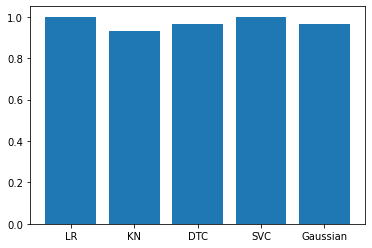

In [57]:
pyplot.bar(names,results)


Policz skuteczność najlepszego modelu.

In [58]:
best = DecisionTreeClassifier()
best.fit(X_train, Y_train)
predictions = klr.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

1.0
[[ 6  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      1.00      1.00        14
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Podsumowanie

1. Jaki problem ML występował w zadaniu? Problem klasyfikacji zdjęć irysa do jego konkretnych gatunków.

2. Jak się rozkłada liczność klas wynikowych? Mamy trzy klasy wynikowe, wszystkie występujące po 50 razy w wejściowym datasecie.

3. Jakie algorytmy ML były rozważane? K-najbliższych sąsiadów, SVC, regresji logistycznej, drzewa decyzyjne, Gaussian Naive Bayes.

4. Który z algorytmów cechował się najwyższą skutecznością? Decision Tree Classifier.

